### Animation

For the 3D visualization of the movement, we use `pydy-viz` package.

In [1]:
from simulation_solution import *
import pydy.viz
from pydy.viz.shapes import Cylinder, Sphere
from pydy.viz.visualization_frame import VisualizationFrame
from pydy.viz.scene import Scene

The joints will be represented with `Sphere` shape whereas the rigid bodies will be a `Cylinder`. A VisualizationFrame object attaches a shape to a reference frame and a point. Fix the visualization frames to the inertial frame.

In [2]:
# Joints associated with Sphere objects with 0.1 radius
ground_joint_shape = Sphere(color='black', radius=0.1) 
lower_arm_joint_shape = Sphere(color='black', radius=0.1)
upper_arm_joint_shape = Sphere(color='black', radius=0.1)
hand_joint_shape = Sphere(color='black', radius=0.1)

# Create a visualization frame 
grund_viz_frame = VisualizationFrame(inertial_frame, ground_joint, ground_joint_shape)
lower_arm_viz_frame = VisualizationFrame(inertial_frame, lower_arm_joint, lower_arm_joint_shape)
upper_arm_viz_frame = VisualizationFrame(inertial_frame, upper_arm_joint, upper_arm_joint_shape)
hand_viz_frame = VisualizationFrame(inertial_frame, hand_joint, hand_joint_shape)

The rigid bodies must be associated with the geometric center. First, create the `Point` objects to hold the value.

In [3]:
# Creating Point objects
lower_arm_center = Point('l_c')
upper_arm_center = Point('u_c')
hand_center = Point('t_c')
finger1_center = Point('t_f1') 
finger2_center = Point('t_f2')

# Setting geometrical positions for the bodies
lower_arm_center.set_pos(ground_joint, lower_arm_length / 2 * lower_arm_frame.y)
upper_arm_center.set_pos(lower_arm_joint, upper_arm_length / 2 * upper_arm_frame.y)
hand_center.set_pos(upper_arm_joint, hand_length / 2 * hand_frame.y)
finger1_center.set_pos(hand_joint, finger1_length * finger1_frame.y)
finger2_center.set_pos(hand_joint, finger2_length * finger2_frame.y)

# Create a dictionary to get easy access.
constants_dict = dict(zip(constants, display_constants))

Now create the `Cylinder` objects to represent the rigid bodies.

In [4]:
# Lower arm shape and visualization frame
lower_arm_shape = Cylinder(radius=0.08, length=constants_dict[lower_arm_length], color='blue')
lower_arm_viz_frame = VisualizationFrame('Lower Arm', lower_arm_frame, lower_arm_center, lower_arm_shape)

# Upper arm shape and visualization frame
upper_arm_shape = Cylinder(radius=0.08, length=constants_dict[upper_arm_length], color='red')
upper_arm_viz_frame = VisualizationFrame('Upper Arm', upper_arm_frame, upper_arm_center, upper_arm_shape)

# Hand shape and visualization frame
hand_shape = Cylinder(radius=0.08, length=constants_dict[hand_length], color='green')
hand_viz_frame = VisualizationFrame('Hand', hand_frame, hand_center, hand_shape)

# Finger 1 shape and visualization frame
finger1_shape = Cylinder(radius=0.08, length=constants_dict[finger1_length], color='black')
finger1_viz_frame = VisualizationFrame('Finger 1', finger1_frame, finger1_center, finger1_shape)

# Finger 2 and visualization frame
finger2_shape = Cylinder(radius=0.08, length=constants_dict[finger2_length], color='black')
finger2_viz_frame = VisualizationFrame('Finger 2', finger2_frame, finger2_center, finger2_shape)

Create the scence associating the frame and fixed point.

In [5]:
scene = Scene(inertial_frame, ground_joint)

In [6]:
# Append the frames to be visualized in a list.
scene.visualization_frames = [grund_viz_frame,
                              lower_arm_viz_frame, 
                              upper_arm_viz_frame, 
                              hand_viz_frame, 
                              lower_arm_viz_frame,
                              upper_arm_viz_frame,
                              hand_viz_frame,
                              finger1_viz_frame,
                              finger2_viz_frame]

Input the scene with the list of symbolic states, the list of constants, as well as the numerical values of each.

In [7]:
scene.states_symbols = coordinates + speeds
scene.constants = display_constants
scene.states_trajectories = y

In [8]:
scene.states_symbols

[lambda1(t), lambda2(t), lambda3(t), lambda4(t), lambda5(t), omega1(t), omega2(t), omega3(t), omega4(t), omega5(t)]

In [9]:
scene.display()

c:\Users\Felipe\Desktop\Robot space arm project\kinematics-of-a-space-robot\pydy-resources
Serving HTTP on 127.0.0.1 port 8000 ...
To view visualization, open:

http://localhost:8000/index.html?load=2021-02-16_12-34-27_scene_desc.json
Press Ctrl+C to stop server...


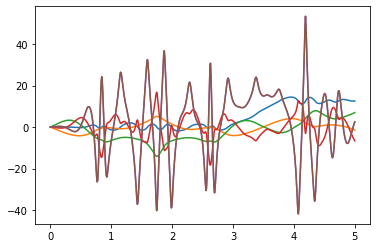

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(t, y[:,4:10])
plt.show()